# Session 3 - Linear Regression 线性回归

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

We want to decide what advertising budget (TV, radio, newspaper) we should select to predict sales.<br>
The data is provided in `Advertising.csv` 

We import the dataset, using the first column as index.

In [99]:
df = pd.read_csv('./data/Advertising.csv', header=0, sep=',', index_col=0)

In [9]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Descriptive Statistics & Exploratory Analysis

Let us get familiar with the data

<Axes: >

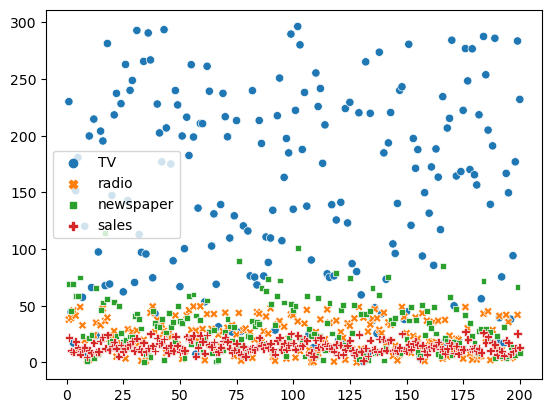

In [12]:
# scatter plot matrix
sns.scatterplot(df)

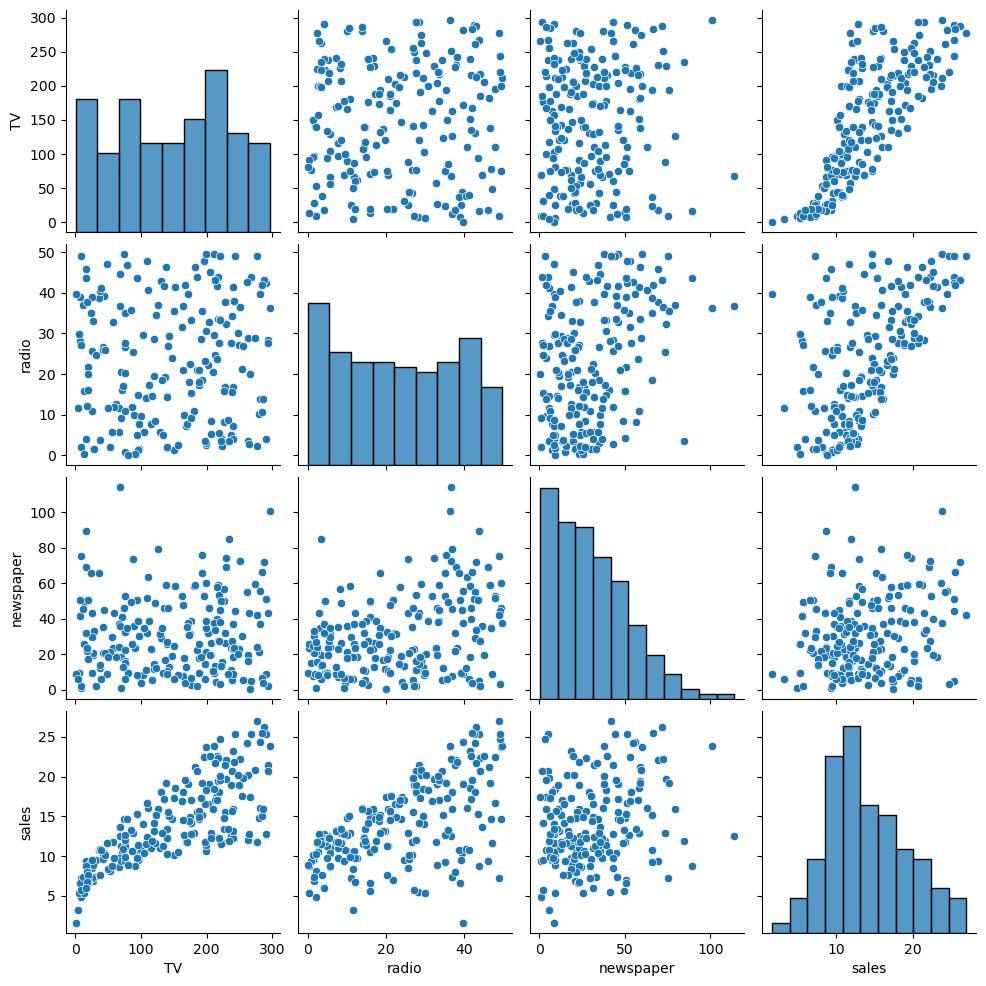

In [31]:
# Create a heatmap pairplot
sns.pairplot(df)

<Axes: >

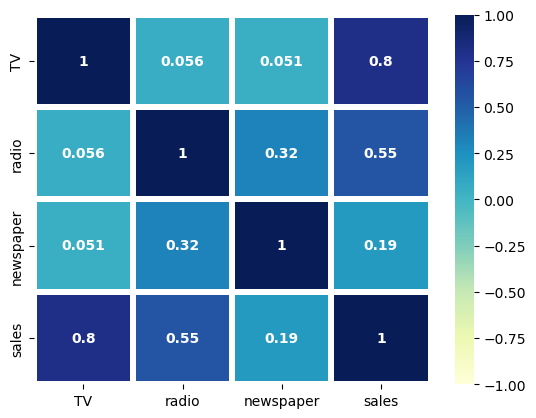

In [40]:
# data = []
# data['target'] = df['sales']
coeff = df.corr( method = 'spearman')
sns.heatmap(coeff, vmin=-1, vmax=1, cmap='YlGnBu', center = 0, annot=True, annot_kws={'size':10,'weight':'bold', 'color':'white'}, linewidths=3)

This bivariate analysis shows several things :
- The relationship between the outcome (sales) and the predictors are non linear (check the trend). 
- Thus some adjustment may be needed by introducing interaction terms or transformation or even polynomial terms.
- The pair correlation heatmap should be computed with Spearman's method as the assumption of linearity is not met.

Les us examine more closely the most significant scatter plot and draw a regression line.

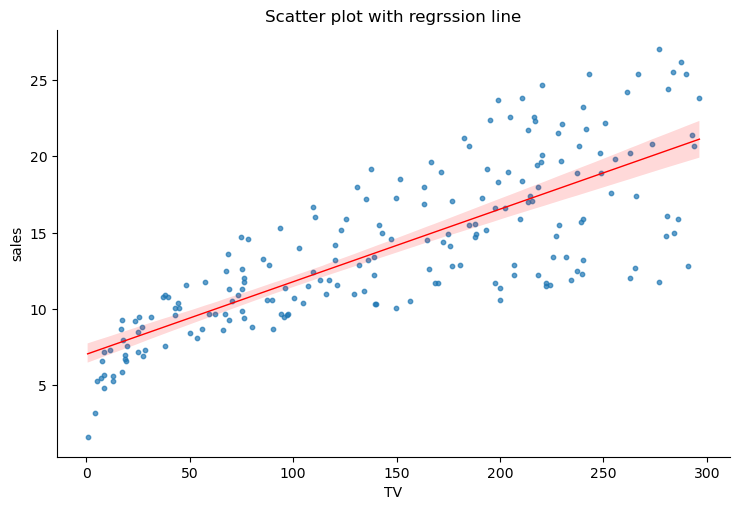

In [47]:
# Create the scatter plot with regression line

## your code here ##

# Show the plot

## your code here ##

sns.lmplot(x = 'TV', y = 'sales', data = df, aspect = 1.5, line_kws={'color':'red', 'linewidth' : 1}, scatter_kws={'s':10, 'alpha' : 0.7})

# aspect设置长宽比

plt.title('Scatter plot with regrssion line')
plt.show()

- The non linearity is quite obvious
- There is also some heteroscedasticity 异方差性

## An example of simple linear regression

Let us take the above example, as an illustration of simple linear regression (meaning : one predictor only)

In [55]:
# instantiate a linear regression model from scikit learn
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [56]:
# define the outcome (sales) and the predictor (TV)
df_features = df[['TV']]
df_target = df['sales']

In [58]:
# fit the model on the whole dataset (find the paremeters that minimize SSE)
linear = linear.fit(df_features, df_target)


In [59]:
# predict the outbut, from the predictor alone and save the result
y_pred = linear.predict(df_features)

In [66]:
# compute RMSE and RMSE/mean(Y) : the coefficient of variation of the errors
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(df_target, y_pred))
rmse_per_mean = RMSE/np.mean(df_target)
print(f"root mean squared error:{RMSE:.3f}")
print(f"root mean squared error per sales mean:{rmse_per_mean:.3f}")

root mean squared error:3.242
root mean squared error per sales mean:0.231


In [84]:
# compute R² and R²adjusted
from sklearn.metrics import r2_score

n = df_features.shape[0] # 多少行
p = df_features.shape[1] # 多少列

R2 = r2_score(df_target, y_pred)
R2_adj = 1 - (n - 1) * (1 - R2) / (n - p - 1)
print(f'R² = {R2:.3f}')
print(f'R²adjusted = {R2_adj:.3f}')
 

R² = 0.612
R²adjusted = 0.610


Now, let us create a function that computes all the performance indicators for a linear regression

In [83]:
"""
Une fonction pour appliquer la regression linéaire et évaluer la performance de la module

"""

def LR_performance(X,y): # Obtain the outcome (y) and the predictor (X)
    
    # Les packages
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score


    # Conformer la module regression linéaire
    linres = LinearRegression()
    linres = linres.fit(X,y)
    y_pred = linres.predict(X)
    
    # Calculer RMSE
    RMSE = np.sqrt(mean_squared_error(y, y_pred))
    
    # Calculer rmse_per_mean
    rmse_per_mean = RMSE/np.mean(y)
    
    # Calculer R2
    n = df_features.shape[0]
    p = df_features.shape[1]
    R2 = r2_score(y, y_pred)
    
    # Calculer R2_adj
    R2_adj = 1 - (n - 1) * (1 - R2) / (n - p - 1)
    
    return linres, RMSE, rmse_per_mean, R2, R2_adj

Save the results (outputs) of the performance function and print them

In [85]:
linres, RMSE, rmse_per_mean, R2, R2_adj, = LR_performance(df[['TV']],df['sales'])

print(f"root mean squared error:{RMSE:.3f}")
print(f"root mean squared error per sales mean:{rmse_per_mean:.3f}")
print(f'R² = {R2:.3f}')
print(f'R²adjusted = {R2_adj:.3f}')

root mean squared error:3.242
root mean squared error per sales mean:0.231
R² = 0.612
R²adjusted = 0.610


check the type of object we get after fitting (use dir)

In [86]:
dir(linres)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n

## Multiple Linear Regression - Step 1

compare the results when we include the two first variables

In [88]:
# Select radio and TV as predictors

X = df[['radio','TV']]
y = df['sales']

In [89]:
# Compute performance

linres, RMSE, rmse_per_mean, R2, R2_adj, = LR_performance(X,y)

root mean squared error:1.669
root mean squared error per sales mean:0.119
R² = 0.897
R²adjusted = 0.897


In [90]:
# Print the results

print(f"root mean squared error:{RMSE:.3f}")
print(f"root mean squared error per sales mean:{rmse_per_mean:.3f}")
print(f'R² = {R2:.3f}')
print(f'R²adjusted = {R2_adj:.3f}')

root mean squared error:1.669
root mean squared error per sales mean:0.119
R² = 0.897
R²adjusted = 0.897


the performance of our model has dramatically improved

Let us create a table summarizing all the relevant outputs

In [91]:
# first collect the coefficient (weight) estimated values

coefficients = linres.coef_
intercept = linres.intercept_
print(coefficients)
print(intercept)

[0.18799423 0.04575482]
2.9210999124051433


In [93]:
# then include the standardized coefficients (use the formula)

std_devs_X = X.std(axis=0)
std_devs_y = y.std(axis=0)

standardized_coeffs = coefficients * std_devs_X / std_devs_y

print(standardized_coeffs)

radio    0.534957
TV       0.752904
dtype: float64


In [96]:
pd.DataFrame({'coefficients' : coefficients, 'standardized_coeffs' : standardized_coeffs, 'intercept' : intercept})

,coefficients,standardized_coeffs,intercept
radio,0.187994,0.534957,2.9211
TV,0.045755,0.752904,2.9211


In [23]:
# create a function that prints a table of these resuts

# linear_regression_eq = f'y = {intercept} + {coefficients[0]} * x1 + {coefficients[1]} * x2 + ...'

#### Explainability with standardized coefficients

In [11]:
# print the table with the coefficients and standardized coefficients



Now apply the linear model on the standardized data

[[ 9.69852266e-01  9.81522472e-01  1.55205313e+00]
 [-1.19737623e+00  1.08280781e+00 -6.96046111e-01]
 [-1.51615499e+00  1.52846331e+00 -9.07405869e-01]
 [ 5.20496822e-02  1.21785493e+00  8.60330287e-01]
 [ 3.94182198e-01 -8.41613655e-01 -2.15683025e-01]
 [-1.61540845e+00  1.73103399e+00 -1.31091086e+00]
 [-1.04557682e+00  6.43904671e-01 -4.27042783e-01]
 [-3.13436589e-01 -2.47406325e-01 -1.58039455e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.77205942e+00]
 [ 6.16042873e-01 -1.39530685e+00 -6.57617064e-01]
 [-9.45155670e-01 -1.17923146e+00 -1.04190753e+00]
 [ 7.90028350e-01  4.96973404e-02  6.48970529e-01]
 [-1.43908760e+00  7.99208859e-01 -9.26620392e-01]
 [-5.78501712e-01 -1.05768905e+00 -8.30547775e-01]
 [ 6.66253447e-01  6.50657027e-01  9.56402904e-01]
 [ 5.64664612e-01  1.65000572e+00  1.60969670e+00]
 [-9.25304978e-01  9.00494200e-01 -2.92541119e-01]
 [ 1.56887609e+00  1.10306488e+00  1.99398717e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.23115400e-01]
 [ 3.00679600e-03  4.29449843e-

<Axes: >

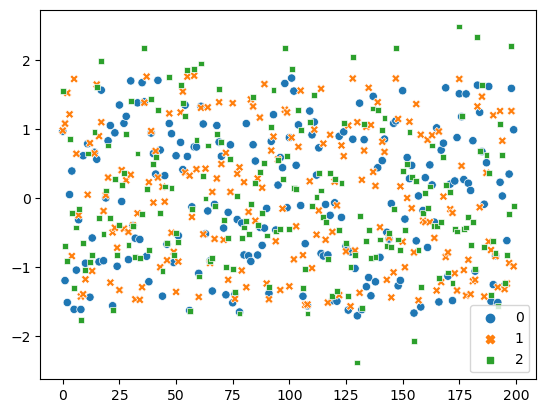

In [102]:
# standardize the dataframe and print it

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
features_to_scale = df[['TV', 'radio', 'sales']]
scaled_features = scaler.fit_transform(features_to_scale)

print(scaled_features)

sns.scatterplot(scaled_features)

In [108]:
# repeat again all the previous steps (maybe you could create a function ?)

X = scaled_features[:,0:2]
y = scaled_features[:,2]
linres, RMSE, rmse_per_mean, R2, R2_adj = LR_performance(X, y)

print(f"root mean squared error:{RMSE:.3f}")
print(f"root mean squared error per sales mean:{rmse_per_mean:.3f}")
print(f'R² = {R2:.3f}')
print(f'R²adjusted = {R2_adj:.3f}')

root mean squared error:0.321
root mean squared error per sales mean:-1900005515702549.250
R² = 0.897
R²adjusted = 0.897


In [109]:
def LR_performance(X,y): # Obtain the outcome (y) and the predictor (X)
    
    # Les packages
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.preprocessing import StandardScaler


    # Conformer la module regression linéaire
    linres = LinearRegression()
    linres = linres.fit(X,y)
    y_pred = linres.predict(X)
    
    # Calculer RMSE
    RMSE = np.sqrt(mean_squared_error(y, y_pred))
    
    # Calculer rmse_per_mean
    rmse_per_mean = RMSE/np.mean(y)
    
    # Calculer R2
    n = df_features.shape[0]
    p = df_features.shape[1]
    R2 = r2_score(y, y_pred)
    
    # Calculer R2_adj
    R2_adj = 1 - (n - 1) * (1 - R2) / (n - p - 1)
    
    coefficients = linres.coef_
    intercept = linres.intercept_
    
    std_devs_X = X.std(axis=0)
    std_devs_y = y.std(axis=0)

    standardized_coeffs = coefficients * std_devs_X / std_devs_y
    perf = pd.DataFrame({'coefficients' : coefficients, 'standardized_coeffs' : standardized_coeffs, 'intercept' : intercept})
    
    print(f"root mean squared error:{RMSE:.3f}")
    print(f"root mean squared error per sales mean:{rmse_per_mean:.3f}")
    print(f'R² = {R2:.3f}')
    print(f'R²adjusted = {R2_adj:.3f}')
    print(perf)
    
    display(sns.scatterplot(X))
    
    return None

root mean squared error:1.669
root mean squared error per sales mean:0.119
R² = 0.897
R²adjusted = 0.897
       coefficients  standardized_coeffs  intercept
radio      0.187994             0.534957     2.9211
TV         0.045755             0.752904     2.9211


<Axes: >

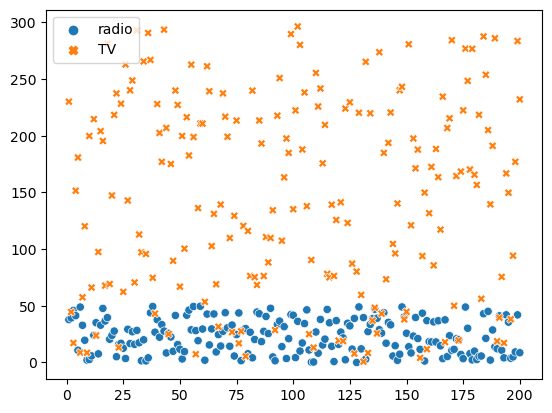

In [113]:
X = scaled_features[:,0:2]
y = scaled_features[:,2]
LR_performance(X, y)

### Conclusion

Standardized coefficients, may be obtained in two ways

## Multiple Linear Regression - Step 2

root mean squared error:1.669
root mean squared error per sales mean:0.119
R² = 0.897
R²adjusted = 0.897
           coefficients  standardized_coeffs  intercept
radio          0.188530             0.536482   2.938889
TV             0.045765             0.753066   2.938889
newspaper     -0.001037            -0.004331   2.938889


<Axes: >

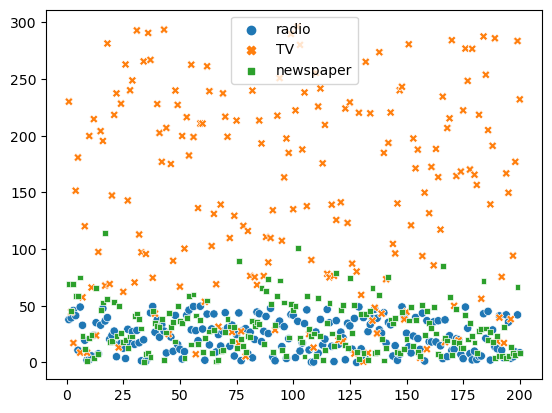

In [114]:
# now select all the predictors

X = df[['radio','TV','newspaper']]
y = df['sales']
LR_performance(X, y)

In [115]:
scaler = StandardScaler()
features_to_scale = df[['TV', 'radio', 'newspaper']]
scaled_features = scaler.fit_transform(features_to_scale)

root mean squared error:1.669
root mean squared error per sales mean:0.119
R² = 0.897
R²adjusted = 0.897
   coefficients  standardized_coeffs  intercept
0      3.919254             0.751181    14.0225
1      2.792063             0.535139    14.0225
2     -0.022539            -0.004320    14.0225


<Axes: >

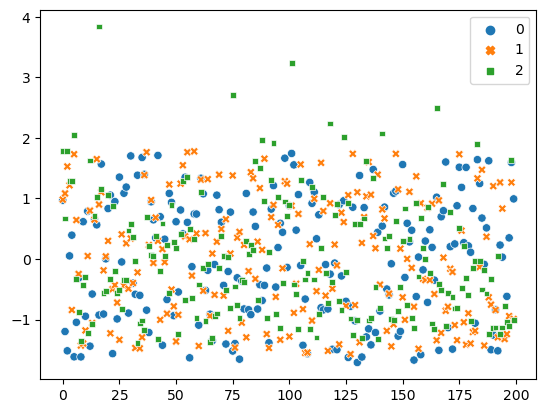

In [116]:
X = scaled_features[:,0:3]
y = df['sales']
LR_performance(X, y)

In [32]:
# compute and print outputs with performances

## your code here ##

In [12]:
# print the table of coefficients including standardized values

## your code here ##

In [35]:
X = df_scale.drop(columns = ['sales'])
y = df_scale['sales']

### Conclusion

#### The addition of `newspaper` in the model reduces the overall error but not the performance. The most parsimonious model should  exclude it.

## Multiple Linear Regression - Step 3

Can we still improve our model ?
- Note that we have not accounted for the non linearity anywhere
- Nor have we attempted to consider heteroscedasticity

One very simple idea would start with making a non linear transformation, for example logarithm

In [39]:
# Create a function that does it all...




In [13]:
# Define out and predictors then run the function that does it all

X = df[['radio','TV']]
y = df['sales']
linres, RMSE, rmse_per_mean, R2, R2_adj, = LR_performance(X,y)

We can see how the transformation of `TV` into `lnTV` has improved our results a bit.
What if we additionally added interaction terms ?

In [47]:
X = pd.DataFrame({'lnTV':np.log(df['TV']), 'radio':df['radio'], 'lnTV x radio': np.log(df['TV'])*df['radio']}) 

In [14]:
# Run the full analysis function #

## your code here ##

Another significant improvement showing how important the interaction term is.
Try another type of interaction

In [49]:
X = pd.DataFrame({'lnTV':np.log(df['TV']), 'radio':df['radio'], 'TV x radio': df['TV']*df['radio']}) 

In [15]:
# Run the full analysis function #

## your code here ##

This is the best model : actually almost perfect !!!

## Discussion

The challenge with linear regression lies in the very fact that there may be significant interaction terms, power terms, transformations that are most of the time beyond our grasp, in real life, especially when the data is more complex.

In such a case, it is usually more interesting to explore models that already account for these interactions...

In [57]:
# Import several other models of regression from scikit learn #

## your code here ##

In [16]:
# Fit these models on the data

## your code here ##

Can these models be that good ?! 